In [1]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2023)
a = np.random.randint(1,100,20)
a

array([88, 26, 71, 56, 34, 93,  4, 53, 87, 97, 23, 18, 54, 48, 78, 40, 70,
       89,  4, 59])

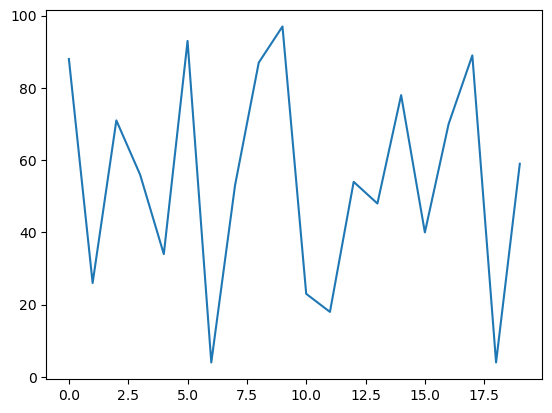

In [2]:
plt.plot (a)

In [3]:
def find_extremums(array):
    maximums, minimums = [], []

    # Check the first point as a special case
    if array[0] > array[1]:
        maximums.append((array[0], 0))
    elif array[0] < array[1]:
        minimums.append((array[0], 0))

    # Check all other points in the middle
    for i in range(1, len(array) - 1):
        if array[i] > array[i-1] and array[i] > array[i+1]:
            maximums.append((array[i], i))
        elif array[i] < array[i-1] and array[i] < array[i+1]:
            minimums.append((array[i], i))

    # Check the last point as a special case
    if array[-1] > array[-2]:
        maximums.append((array[-1], len(array) - 1))
    elif array[-1] < array[-2]:
        minimums.append((array[-1], len(array) - 1))

    return maximums, minimums

maximums, minimums = find_extremums(a)
print('Maximums:', maximums)
print('Minimums:', minimums)

Maximums: [(88, 0), (71, 2), (93, 5), (97, 9), (54, 12), (78, 14), (89, 17), (59, 19)]
Minimums: [(26, 1), (34, 4), (4, 6), (18, 11), (48, 13), (40, 15), (4, 18)]


In [4]:
max_value = max(maximums, key=lambda x: x[0])
print('Max value in maximums:', max_value)

Max value in maximums: (97, 9)


In [5]:
def filter_maximums(maximums, max_value):
    filtered_start_to_max = []
    filtered_end_to_max = []

    # Initial value - first value in the list of maximums
    prev_value_start = maximums[0][0]
    filtered_start_to_max.append(maximums[0])

    # Increasing sequence until the maximum value
    for value, index in maximums[1:]:
        if value == max_value[0]:
            break
        if value > prev_value_start:
            filtered_start_to_max.append((value, index))
            prev_value_start = value

    # Initial value for the decreasing sequence - the last element
    prev_value_end = maximums[-1][0]
    filtered_end_to_max.append(maximums[-1])

    # Decreasing sequence from the end to the maximum value
    for value, index in reversed(maximums[:-1]):
        if value == max_value[0]:
            break
        if value > prev_value_end:
            filtered_end_to_max.append((value, index))
            prev_value_end = value

    filtered_end_to_max.reverse()

    # Combine the two lists and add the maximum value
    filtered = filtered_start_to_max + [max_value] + filtered_end_to_max

    return filtered

max_value = max(maximums, key=lambda x: x[0])

filtered = filter_maximums(maximums, max_value)
print(filtered)

[(88, 0), (93, 5), (97, 9), (89, 17), (59, 19)]


In [6]:
def find_lakes(array, filtered_maximums):
    lakes = []
    for i in range(len(filtered_maximums) - 1):
        start_max = filtered_maximums[i]
        end_max = filtered_maximums[i+1]

        lake_bottom = min(array[start_max[1]:end_max[1]+1])
        lake_depth = min(start_max[0], end_max[0]) - lake_bottom
        if lake_depth > 0:
            lakes.append((lake_bottom, lake_depth, start_max[1], end_max[1]))
    return lakes

lakes = find_lakes(a, filtered)
for lake in lakes:
    print(f"Lake bottom: {lake[0]}, Depth: {lake[1]}, Start: {lake[2]}, End: {lake[3]}")

Lake bottom: 26, Depth: 62, Start: 0, End: 5
Lake bottom: 4, Depth: 89, Start: 5, End: 9
Lake bottom: 18, Depth: 71, Start: 9, End: 17
Lake bottom: 4, Depth: 55, Start: 17, End: 19


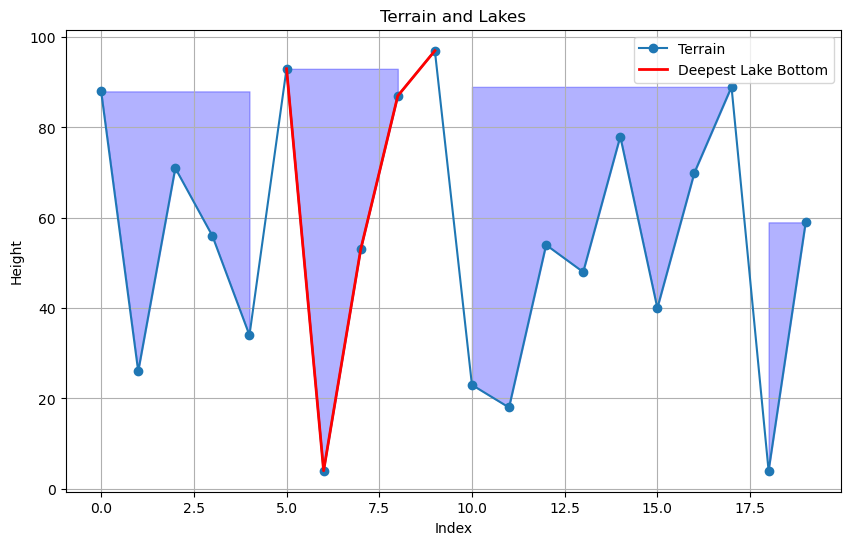

Depth of the deepest lake: 89


In [7]:
# Drawing the lakes and terrain
def draw_lakes_and_terrain(a, lakes):
    plt.figure(figsize=(10,6))
    plt.plot(a, '-o', label="Terrain")
    
    for lake in lakes:
        lake_bottom, lake_depth, start, end = lake
        lake_level = min(a[start], a[end])
        plt.fill_between(range(start, end+1), a[start:end+1], [lake_level]*len(range(start, end+1)), where=[(height <= lake_level) for height in a[start:end+1]], color='blue', alpha=0.3)
    
    # Highlight the bottom of the deepest lake
    if lakes:
        deepest_lake = max(lakes, key=lambda x: x[1])
        plt.plot(range(deepest_lake[2], deepest_lake[3]+1), a[deepest_lake[2]:deepest_lake[3]+1], color='red', linewidth=2, label="Deepest Lake Bottom")
    
    plt.legend()
    plt.title("Terrain and Lakes")
    plt.xlabel("Index")
    plt.ylabel("Height")
    plt.grid(True)
    plt.show()

    # Outputting the depth of the deepest lake
    deepest_depth = max([lake[1] for lake in lakes]) if lakes else 0
    print(f"Depth of the deepest lake: {deepest_depth}")

# Assuming you have the 'filtered' variable ready and populated 
lakes = find_lakes(a, filtered)
draw_lakes_and_terrain(a, lakes)